In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hhiimanshuagarwal/predictive-maintenance-dataset

403 - Forbidden - Permission 'datasets.get' was denied


## Load the Basic Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset


In [2]:
df = pd.read_csv('/content/predictive_maintenance_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


## Data Preprocessing

In [6]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

,0
date,0
device,0
failure,0
metric1,0
metric2,0
metric3,0
metric4,0
metric5,0
metric6,0
metric7,0


### Convert the 'date' column to datetime format for further manipulation.
###  Calculates the number of active days for each device since the first recorded date.
###  Extracts the month from the date.
###  Extracts the day of the week


In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
df['activedays'] = df.date - df.date[0]

In [9]:
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

In [10]:
df['weekday'].replace(0,7,inplace=True)

<ipython-input-10-e74facfb0891>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weekday'].replace(0,7,inplace=True)


In [11]:
df['activedays'] = df['activedays'].astype(str)
df['activedays'] = df['activedays'].str.split(' ').str[0]
df['activedays'] = df['activedays'].astype(int)

In [15]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0,1,3


In [16]:
df['device'].value_counts()

,count
device,
Z1F0QL3N,304
W1F0SJJ2,304
S1F0EGMT,304
S1F0FGBQ,304
S1F0FP0C,304
...,...
S1F0CSRZ,5
S1F0CT09,5
S1F04KSC,4


## Normalizing the Data using MinMaxScaler



In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
metric_column = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

In [19]:
scaler = MinMaxScaler()
df[metric_column] = scaler.fit_transform(df[metric_column])

In [23]:
df = df.sort_values(by=['device','date']).reset_index(drop=True)

In [24]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday
0,2015-01-01,S1F01085,0,0.883224,0.000847,0.0,0.031212,0.051546,0.591204,0.0,0.0,0.0001,0,1,3
1,2015-01-02,S1F01085,0,0.006762,0.000862,0.0,0.031212,0.051546,0.591204,0.0,0.0,0.0001,1,1,4
2,2015-01-03,S1F01085,0,0.507975,0.000862,0.0,0.031212,0.051546,0.591204,0.0,0.0,0.0001,2,1,5
3,2015-01-04,S1F01085,0,0.524588,0.000862,0.0,0.031212,0.051546,0.591205,0.0,0.0,0.0001,3,1,6
4,2015-01-05,S1F01085,0,0.398924,0.000862,0.0,0.031212,0.051546,0.592185,0.0,0.0,0.0001,4,1,7


In [27]:
metric_data = metric_column + ['activedays','month','weekday']
metric_data

['metric1',
 'metric2',
 'metric3',
 'metric4',
 'metric5',
 'metric6',
 'metric7',
 'metric8',
 'metric9',
 'activedays',
 'month',
 'weekday']

## Creating Historical Sequences and Labels for last 30 days

In [28]:
# Define sequence length for the historical window (30 days)
sequence_length = 30

# Initialize lists to store sequences and labels
X, y = [], []

# Group the data by each device
for device_id, device_data in df.groupby('device'):
    # Extract only the metric values for the current device
    device_metrics = device_data[metric_data].values
    # Extract the failure column for the current device
    device_failures = device_data['failure'].values

    # Generate sequences and corresponding labels
    for i in range(len(device_metrics) - 2 * sequence_length):
        # Create a 30-day sequence of metrics
        X.append(device_metrics[i:i + sequence_length])
        # Label is 1 if any failure occurs in the next 30 days, otherwise 0
        y.append(1 if np.any(device_failures[i + sequence_length:i + 2 * sequence_length]) else 0)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)



In [29]:
# Check the shape of X and y to ensure they are correct
print("Shape of X:", X.shape)  # Should be (num_sequences, 30, num_metrics)
print("Shape of y:", y.shape)  # Should be (num_sequences,)

Shape of X: (77746, 30, 12)
Shape of y: (77746,)


In [31]:
X.shape[2]

12

## Model Building and Training

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout , BatchNormalization


In [36]:
# LSTM Model Building
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, X.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(16, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            19712     
                                                                 
 batch_normalization_6 (Bat  (None, 30, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 30, 32)            12416     
                                                                 
 batch_normalization_7 (Bat  (None, 30, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 30, 32)           

### Model Training

In [40]:
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
972/972 [==============================] - 44s 46ms/step - loss: 0.0066 - accuracy: 0.9992 - val_loss: 3.4502e-04 - val_accuracy: 1.0000
Epoch 2/10
972/972 [==============================] - 45s 46ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/10
972/972 [==============================] - 44s 45ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 3.8384e-04 - val_accuracy: 1.0000
Epoch 4/10
972/972 [==============================] - 42s 44ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
972/972 [==============================] - 44s 45ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 3.5019e-04 - val_accuracy: 1.0000
Epoch 6/10
972/972 [==============================] - 41s 42ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 2.8953e-04 - val_accuracy: 1.0000
Epoch 7/10
972/972 [==============================] - 44s 46ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 6.3206

## Training Visualisation

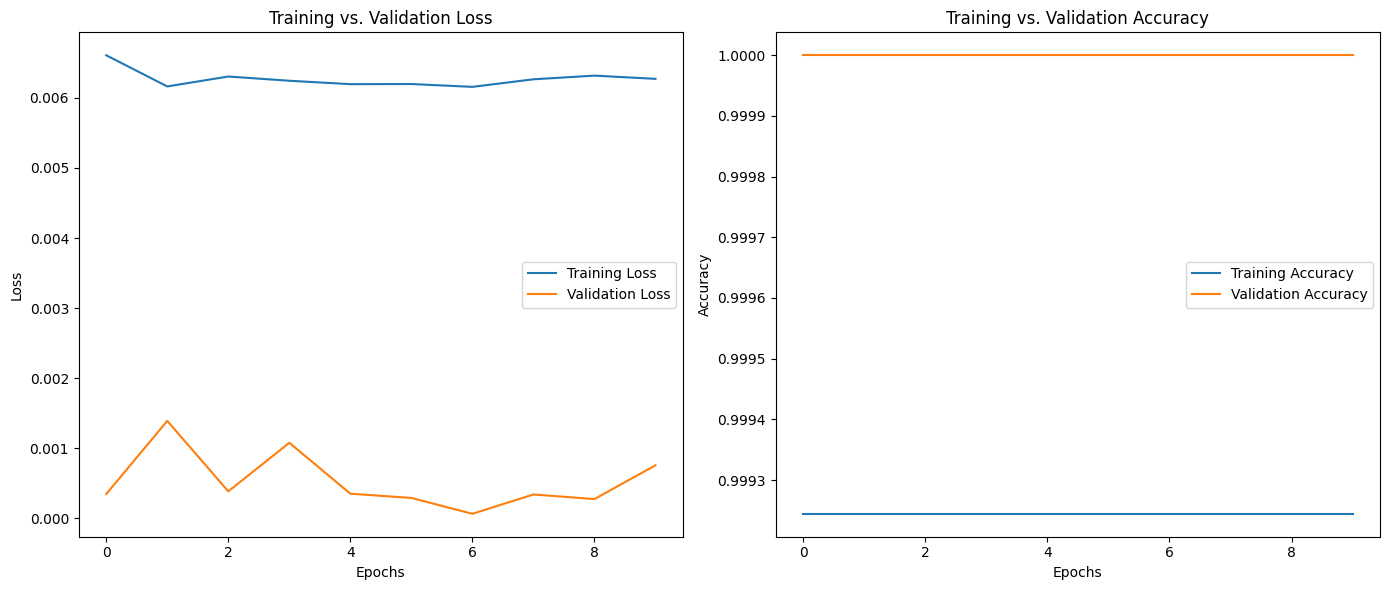

In [41]:
# Extract loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the training loss vs. validation loss
plt.figure(figsize=(14, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


##### As from the above graph we can see that the gap between Training and Validation with respect to Accuracy and Loss is more which indicates the Overfitting of Model which is not Ture as because the range between them is very very small.
##### The Model acheive the Accuracy of 99%.

## Sample Prediction

In [48]:
# Predict for a single 30-day sequence (example sequence)
example_sequence = X[7].reshape(1, sequence_length, X.shape[2])  # Reshape to match input shape
probability_of_failure = model.predict(example_sequence)

print("Probability of failure within the next 30 days:", probability_of_failure[0][0])

1/1 [==============================] - 0s 32ms/step
Probability of failure within the next 30 days: 3.9092583e-06


## Function to predict the Machine Failure providing the Device Id

In [52]:
def predict_failure_for_device(device_id, sequence_length=30):
    # Filter data for the specified device
    device_data = df[df['device'] == device_id]

    # Ensure there are enough records to create a 30-day sequence
    if len(device_data) < sequence_length:
        print("Not enough data for this device to create a 30-day sequence.")
        return None

    # Get the last 30-day metrics sequence for the specified device
    last_30_days = device_data[metric_data].values[-sequence_length:]

    # Reshape to match LSTM input shape (1, sequence_length, num_features)
    input_sequence = np.reshape(last_30_days, (1, sequence_length, last_30_days.shape[1]))

    # Make the prediction
    probability_of_failure = model.predict(input_sequence)[0][0]

    print(f"Probability of failure within the next 30 days for device {device_id}: {probability_of_failure:.4f}")
    return probability_of_failure



In [59]:
# Example usage
device_id = 'S1F0FP0C'
predict_failure_for_device(device_id)


1/1 [==============================] - 0s 30ms/step
Probability of failure within the next 30 days for device S1F0FP0C: 0.0014


0.0013993176